# Classification Analysis

# Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset

credit = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/GermanCredit.csv")
print(credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [7]:
#Choose credit risk as the target variable 

y= credit["credit_risk"]

In [13]:
#Creating dummy variables for the categorical variable

X = pd.get_dummies(credit.drop(columns=["credit_risk"]))

X.head()

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,status_... < 100 DM,status_... >= 200 DM / salary for at least 1 year,status_0 <= ... < 200 DM,...,housing_own,housing_rent,job_management/self-employed/highly qualified employee/officer,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,telephone_no,telephone_yes,foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [14]:
#Splitting the dataset scaling the data and training it

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
logreg = LogisticRegression()
mod1 = logreg.fit(X_train,y_train)

In [15]:
# testing the model 

pred1 = logreg.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred1)

0.78

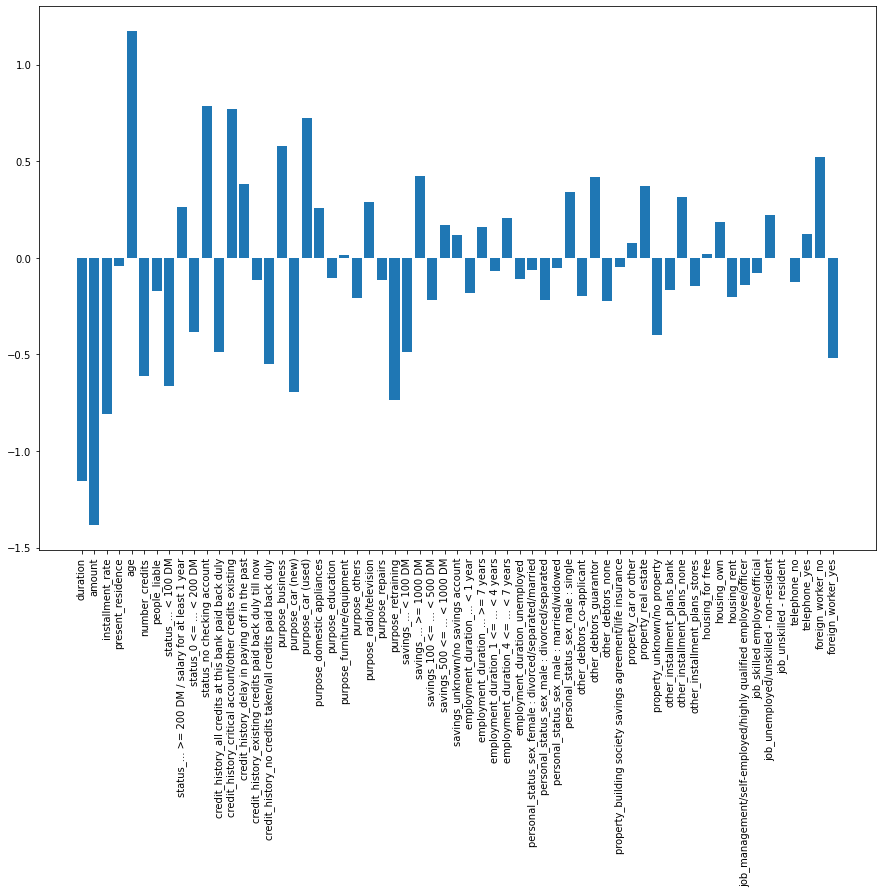

In [16]:
#Plotting to see the weight of each feature to see how important it is

plt.figure(figsize=(15,10))
plt.bar(X_train.columns.tolist(),logreg.coef_[0])
plt.xticks(rotation=90,size=10)
plt.show()

In [19]:
# seeing what the results would be with either L2 regularization

logreg1 = LogisticRegression(penalty="l2",C=0.01)
mod2 = logreg1.fit(X_train,y_train)
pred2 = logreg1.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred2)

0.6966666666666667

In [20]:
# The model become worse which means we need more data as the model is underfitting

# Naive Bayes

In [22]:
#Using a dataset from sklearn called 20 newsgroups which contains 18846 examples in text form belonging to 20 different classes

import seaborn as sns;sns.set()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [23]:
#Loading the dataset and splitting into training and test set

data = fetch_20newsgroups()
train = fetch_20newsgroups(subset="train")
test = fetch_20newsgroups(subset="test")

In [24]:
#Creating the multinomial Naive Bayes classifier and training it. Testing it and storing the predicted outputs

model = make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels = model.predict(test.data)

Text(111.453125, 0.5, 'predicted label')

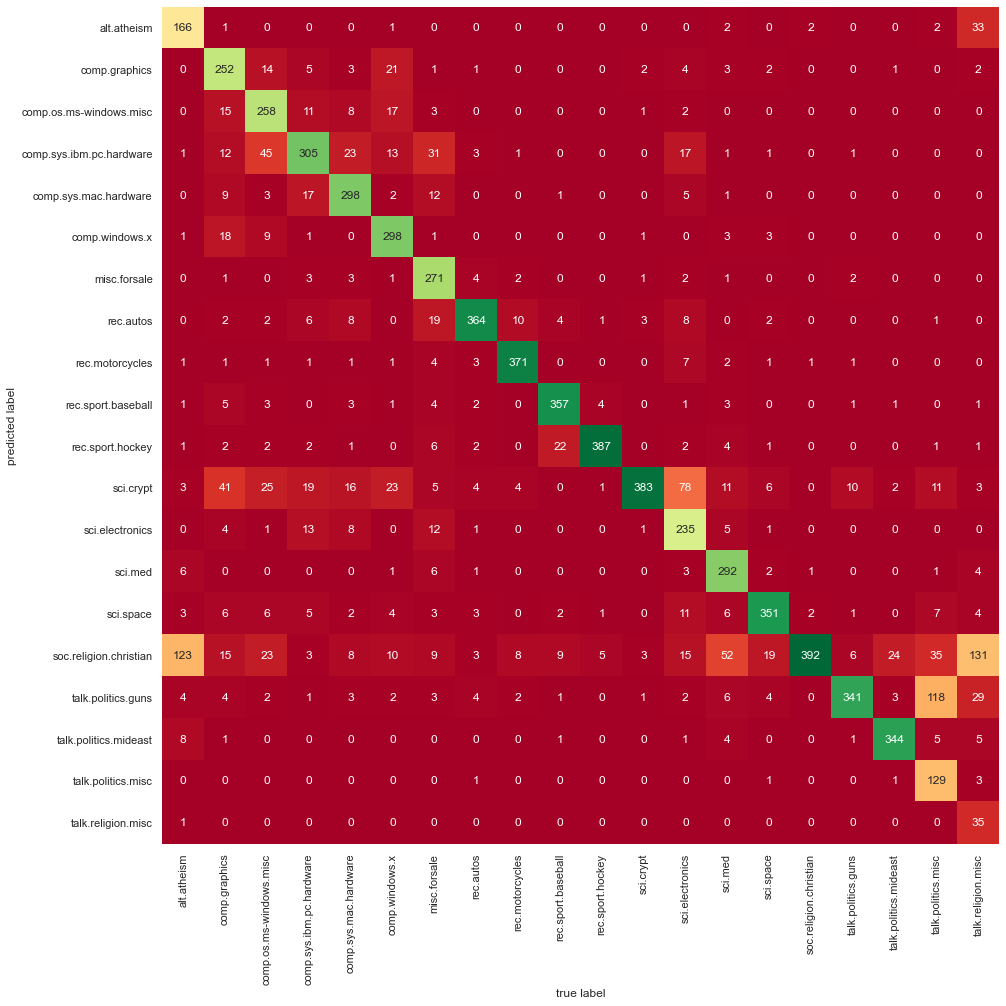

In [25]:
#Because this is a multi-class classification problem we will need a more informative score than the accuracy. So we will use 
# the confusion matrix

mat = confusion_matrix(test.target,labels)
plt.figure(figsize=(15,30))
sns.heatmap(mat.T,square=True,annot=True,fmt="d",cbar=False,cmap="RdYlGn",xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [26]:
# Creating a simple function that gives the predicted class and we use it to predict a given text


def predict_category(s,train=train,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


In [27]:
predict_category("Jesus Christ")

'soc.religion.christian'

In [28]:
predict_category("Bush")

'talk.politics.misc'